In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


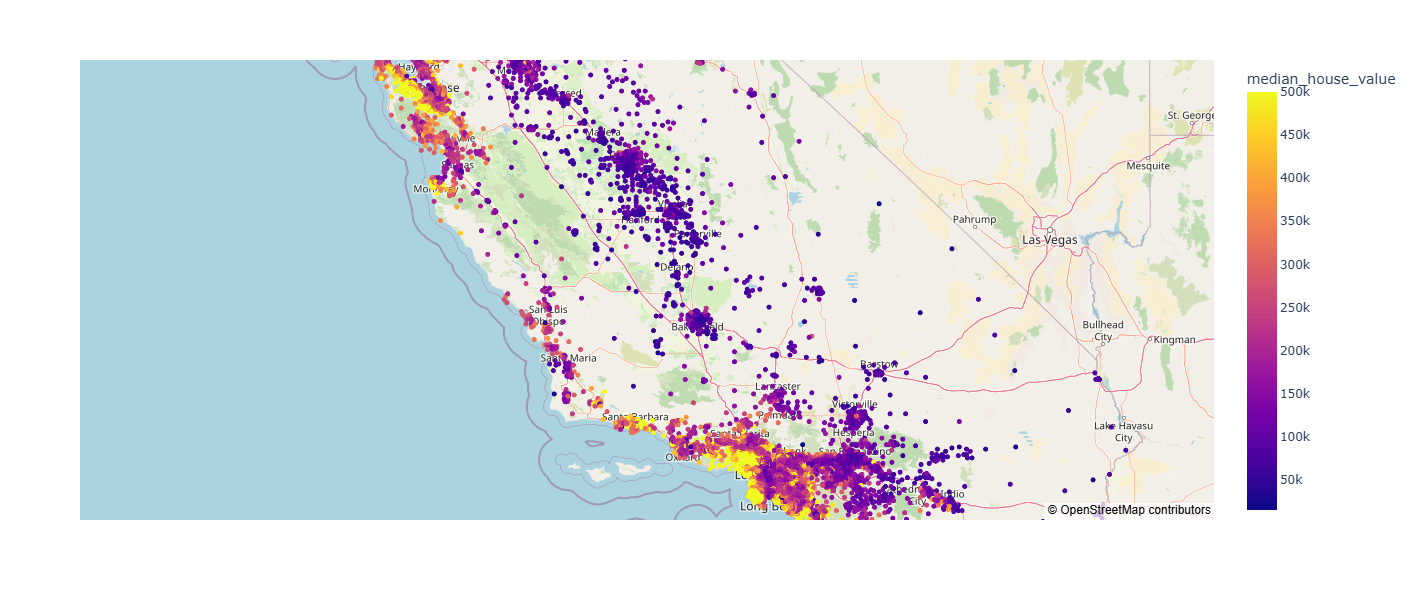

In [ ]:
# Visualizing geographical distribution of median house values
fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    hover_name="ocean_proximity",
    color="median_house_value",
    zoom=6,
    height=600,
    map_style="open-street-map"
)

fig.show()


In [ ]:
# Preparing data for modeling

X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [ ]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Combining X_train and y_train back into a single DataFrame for training data

training_data = X_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_to_SF,median_house_value
6434,-118.01,34.11,32.0,1978.0,536.0,826.0,470.0,2.5114,INLAND,568.750630,212200.0
1964,-120.58,38.77,21.0,1661.0,406.0,789.0,319.0,2.3583,INLAND,194.998323,108700.0
18027,-121.93,37.25,32.0,1555.0,287.0,779.0,284.0,6.0358,<1H OCEAN,72.594010,260100.0
3507,-118.46,34.26,33.0,1358.0,247.0,738.0,235.0,5.0947,<1H OCEAN,528.624947,210300.0
4057,-118.44,34.15,15.0,4420.0,1076.0,1669.0,1016.0,4.6375,<1H OCEAN,539.082736,359100.0
...,...,...,...,...,...,...,...,...,...,...,...
4351,-118.36,34.10,36.0,2963.0,838.0,1129.0,745.0,2.5588,<1H OCEAN,548.094676,500001.0
2933,-118.98,35.37,36.0,1562.0,398.0,1223.0,329.0,0.9675,INLAND,407.184339,47100.0
1448,-122.01,37.98,34.0,1256.0,267.0,638.0,252.0,4.0507,NEAR BAY,42.558968,161000.0
14374,-117.25,32.73,38.0,1840.0,291.0,633.0,283.0,4.9125,NEAR OCEAN,731.173949,383600.0


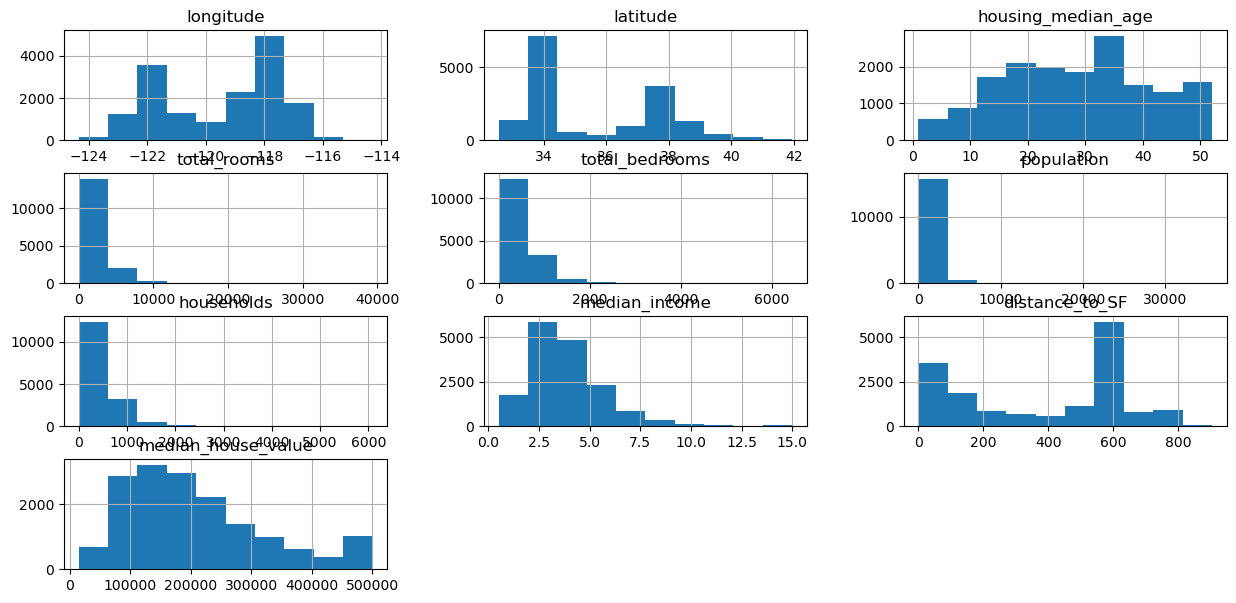

In [ ]:
# Visualizing distributions of features in the training data

training_data.hist(figsize=(15,7))
plt.show()

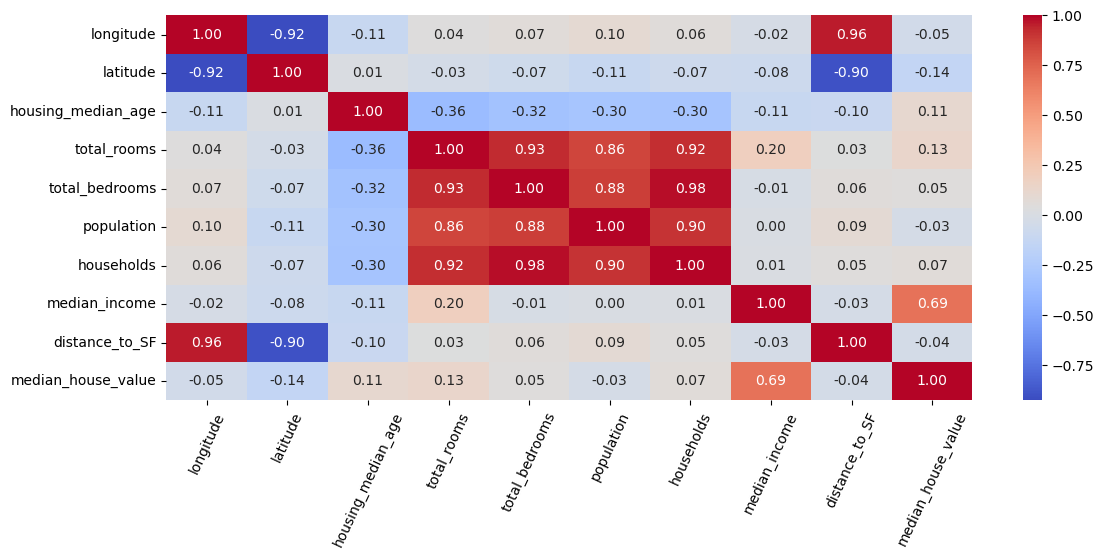

In [ ]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(training_data.select_dtypes("number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=65)
plt.show()

# PreProcessing 

In [ ]:
# Use natural logarith to make the distributions more normal

training_data["total_rooms"] = np.log(training_data["total_rooms"] + 1)
training_data["total_bedrooms"] = np.log(training_data["total_bedrooms"] + 1)
training_data["population"] = np.log(training_data["population"] + 1)
training_data["households"] = np.log(training_data["households"] + 1)

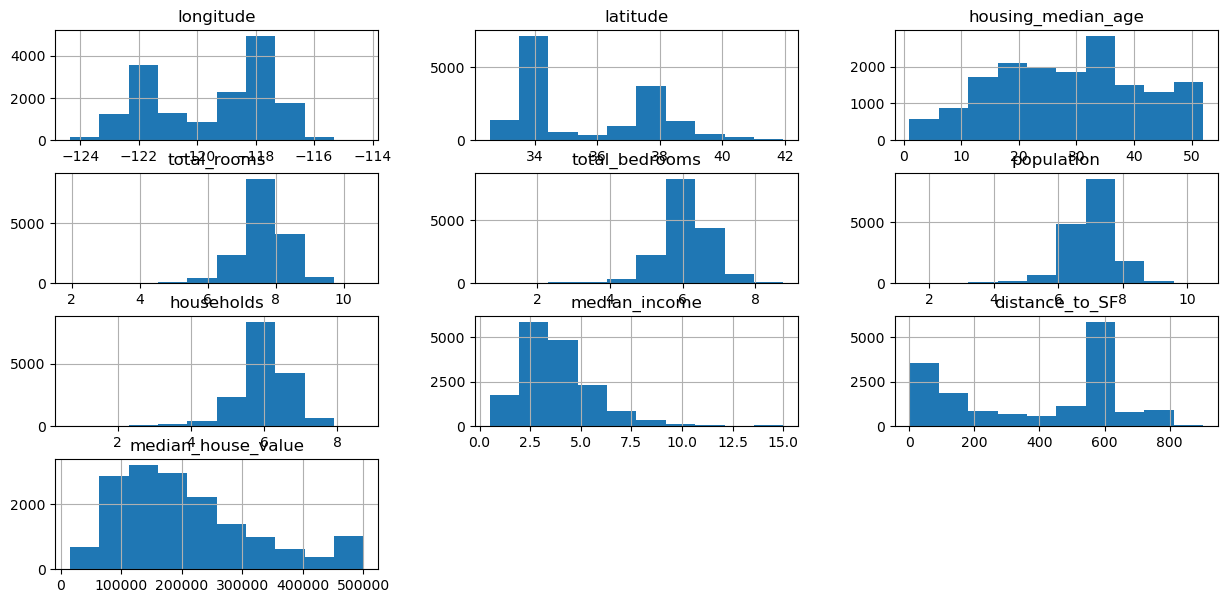

In [ ]:
# Visualizing distributions of features in the training data after log transformation

training_data.hist(figsize=(15, 7))
plt.show()

In [ ]:
training_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7262
INLAND        5172
NEAR OCEAN    2099
NEAR BAY      1809
ISLAND           4
Name: count, dtype: int64

In [ ]:
# One-hot encoding for the 'ocean_proximity' categorical feature

training_data = training_data.join(pd.get_dummies(training_data["ocean_proximity"], dtype=int)).drop("ocean_proximity", axis=1)

In [ ]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,distance_to_SF,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6434,-118.01,34.11,32.0,7.590347,6.285998,6.717805,6.154858,2.5114,568.750630,212200.0,0,1,0,0,0
1964,-120.58,38.77,21.0,7.415777,6.008813,6.672033,5.768321,2.3583,194.998323,108700.0,0,1,0,0,0
18027,-121.93,37.25,32.0,7.349874,5.662960,6.659294,5.652489,6.0358,72.594010,260100.0,1,0,0,0,0
3507,-118.46,34.26,33.0,7.214504,5.513429,6.605298,5.463832,5.0947,528.624947,210300.0,1,0,0,0,0
4057,-118.44,34.15,15.0,8.394121,6.981935,7.420579,6.924612,4.6375,539.082736,359100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,-118.36,34.10,36.0,7.994295,6.732211,7.029973,6.614726,2.5588,548.094676,500001.0,1,0,0,0,0
2933,-118.98,35.37,36.0,7.354362,5.988961,7.109879,5.799093,0.9675,407.184339,47100.0,0,1,0,0,0
1448,-122.01,37.98,34.0,7.136483,5.590987,6.459904,5.533389,4.0507,42.558968,161000.0,0,0,0,1,0
14374,-117.25,32.73,38.0,7.518064,5.676754,6.452049,5.648974,4.9125,731.173949,383600.0,0,0,0,0,1


In [ ]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=65)
plt.show()

NameError: name 'plt' is not defined

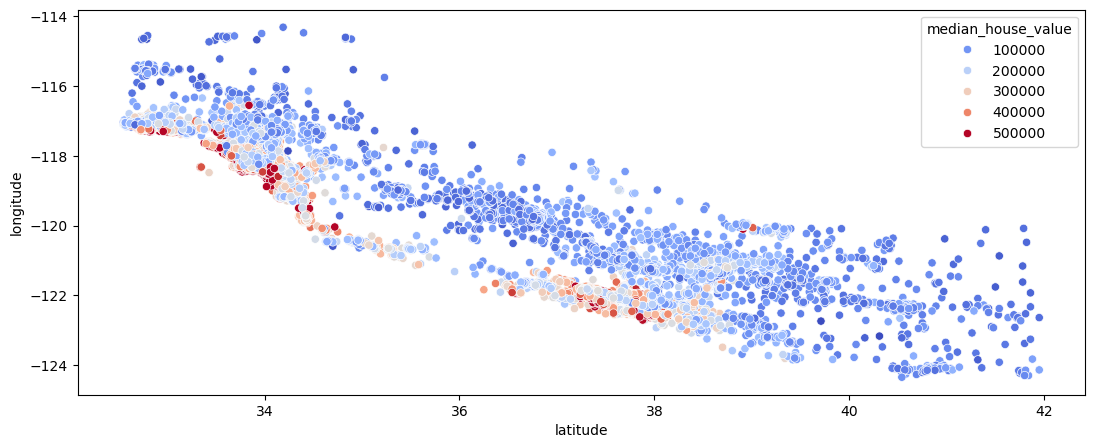

In [ ]:
# 
plt.figure(figsize=(13, 5))
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value", palette="coolwarm")
plt.show()

## Feature Engineering

In [ ]:
training_data["bedroom_ratio"] = training_data["total_bedrooms"]/training_data["total_rooms"]
training_data["household_rooms"] = training_data["total_rooms"]/training_data["households"]

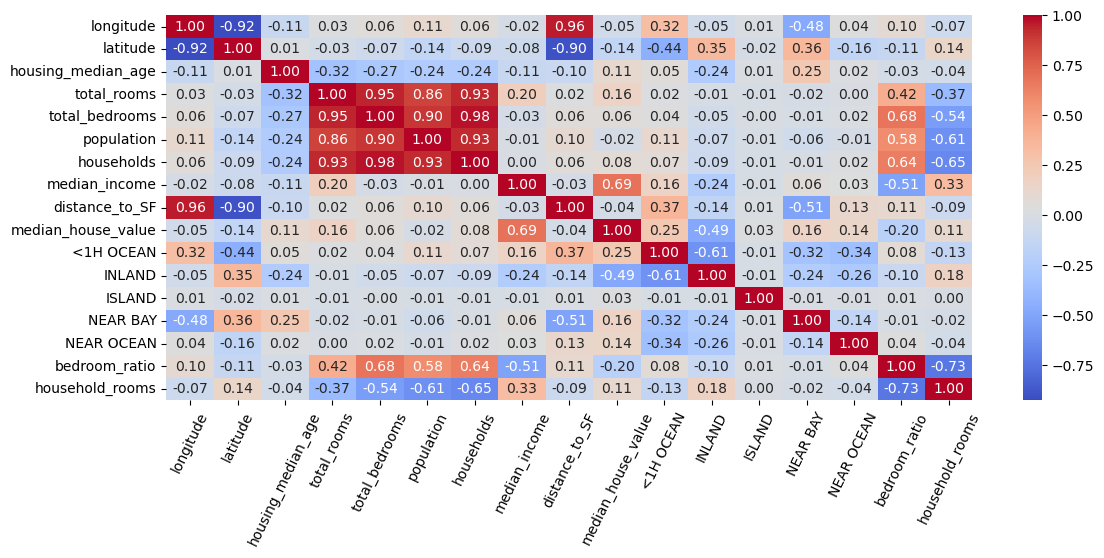

In [ ]:
# Use heatmap to see correlations again
plt.figure(figsize=(13, 5))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=64)
plt.show()

## Model Building

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_to_SF
6434,-118.01,34.11,32.0,1978.0,536.0,826.0,470.0,2.5114,INLAND,568.750630
1964,-120.58,38.77,21.0,1661.0,406.0,789.0,319.0,2.3583,INLAND,194.998323
18027,-121.93,37.25,32.0,1555.0,287.0,779.0,284.0,6.0358,<1H OCEAN,72.594010
3507,-118.46,34.26,33.0,1358.0,247.0,738.0,235.0,5.0947,<1H OCEAN,528.624947
4057,-118.44,34.15,15.0,4420.0,1076.0,1669.0,1016.0,4.6375,<1H OCEAN,539.082736
...,...,...,...,...,...,...,...,...,...,...
4351,-118.36,34.10,36.0,2963.0,838.0,1129.0,745.0,2.5588,<1H OCEAN,548.094676
2933,-118.98,35.37,36.0,1562.0,398.0,1223.0,329.0,0.9675,INLAND,407.184339
1448,-122.01,37.98,34.0,1256.0,267.0,638.0,252.0,4.0507,NEAR BAY,42.558968
14374,-117.25,32.73,38.0,1840.0,291.0,633.0,283.0,4.9125,NEAR OCEAN,731.173949


In [ ]:
X_train, y_train = training_data.drop(["median_house_value"], axis=1), training_data["median_house_value"]

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,distance_to_SF,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6434,-118.01,34.11,32.0,7.590347,6.285998,6.717805,6.154858,2.5114,568.750630,0,1,0,0,0,0.828157,1.233229
1964,-120.58,38.77,21.0,7.415777,6.008813,6.672033,5.768321,2.3583,194.998323,0,1,0,0,0,0.810274,1.285604
18027,-121.93,37.25,32.0,7.349874,5.662960,6.659294,5.652489,6.0358,72.594010,1,0,0,0,0,0.770484,1.300290
3507,-118.46,34.26,33.0,7.214504,5.513429,6.605298,5.463832,5.0947,528.624947,1,0,0,0,0,0.764214,1.320411
4057,-118.44,34.15,15.0,8.394121,6.981935,7.420579,6.924612,4.6375,539.082736,1,0,0,0,0,0.831765,1.212215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,-118.36,34.10,36.0,7.994295,6.732211,7.029973,6.614726,2.5588,548.094676,1,0,0,0,0,0.842127,1.208560
2933,-118.98,35.37,36.0,7.354362,5.988961,7.109879,5.799093,0.9675,407.184339,0,1,0,0,0,0.814341,1.268192
1448,-122.01,37.98,34.0,7.136483,5.590987,6.459904,5.533389,4.0507,42.558968,0,0,0,1,0,0.783437,1.289713
14374,-117.25,32.73,38.0,7.518064,5.676754,6.452049,5.648974,4.9125,731.173949,0,0,0,0,1,0.755082,1.330872


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_to_SF
150,-122.22,37.81,52.0,2024.0,339.0,756.0,340.0,4.0720,NEAR BAY,17.950751
14588,-117.19,32.83,30.0,2288.0,448.0,1240.0,469.0,4.0114,NEAR OCEAN,726.039331
15033,-116.99,32.79,26.0,3623.0,703.0,1609.0,669.0,3.7440,<1H OCEAN,741.402526
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,NEAR BAY,53.854345
9878,-121.86,36.63,37.0,338.0,109.0,231.0,100.0,2.5313,<1H OCEAN,136.607166
...,...,...,...,...,...,...,...,...,...,...
11373,-117.97,33.68,23.0,1722.0,316.0,865.0,309.0,4.6452,<1H OCEAN,606.992165
1537,-122.04,37.90,20.0,5467.0,1044.0,2310.0,963.0,5.6986,NEAR BAY,36.104904
4454,-118.17,34.10,37.0,299.0,89.0,318.0,92.0,1.3125,<1H OCEAN,559.632325
7817,-118.11,33.89,34.0,2508.0,594.0,1549.0,545.0,3.2069,<1H OCEAN,580.826249


In [ ]:
testing_data = X_test.join(y_test)

# Take the natural logarithm of the same features in the test set
testing_data["total_rooms"] = np.log(testing_data["total_rooms"] + 1)
testing_data["total_bedrooms"] = np.log(testing_data["total_bedrooms"] + 1)
testing_data["population"] = np.log(testing_data["population"] + 1)
testing_data["households"] = np.log(testing_data["households"] + 1)

# One-hot encoding for categorical feature in test set
testing_data = testing_data.join(pd.get_dummies(testing_data["ocean_proximity"], dtype=int)).drop(["ocean_proximity"], axis=1)

# Same feature engineering on test set
testing_data["bedroom_ratio"] = testing_data["total_bedrooms"]/testing_data["total_rooms"]
testing_data["household_rooms"] = testing_data["total_rooms"]/testing_data["households"]

In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_to_SF
150,-122.22,37.81,52.0,2024.0,339.0,756.0,340.0,4.0720,NEAR BAY,17.950751
14588,-117.19,32.83,30.0,2288.0,448.0,1240.0,469.0,4.0114,NEAR OCEAN,726.039331
15033,-116.99,32.79,26.0,3623.0,703.0,1609.0,669.0,3.7440,<1H OCEAN,741.402526
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,NEAR BAY,53.854345
9878,-121.86,36.63,37.0,338.0,109.0,231.0,100.0,2.5313,<1H OCEAN,136.607166
...,...,...,...,...,...,...,...,...,...,...
11373,-117.97,33.68,23.0,1722.0,316.0,865.0,309.0,4.6452,<1H OCEAN,606.992165
1537,-122.04,37.90,20.0,5467.0,1044.0,2310.0,963.0,5.6986,NEAR BAY,36.104904
4454,-118.17,34.10,37.0,299.0,89.0,318.0,92.0,1.3125,<1H OCEAN,559.632325
7817,-118.11,33.89,34.0,2508.0,594.0,1549.0,545.0,3.2069,<1H OCEAN,580.826249


In [ ]:
X_test, y_test = testing_data.drop(["median_house_value"], axis=1), testing_data["median_house_value"]

In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,distance_to_SF,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
150,-122.22,37.81,52.0,7.613325,5.828946,6.629363,5.831882,4.0720,17.950751,0,0,0,1,0,0.765624,1.305466
14588,-117.19,32.83,30.0,7.735870,6.107023,7.123673,6.152733,4.0114,726.039331,0,0,0,0,1,0.789442,1.257306
15033,-116.99,32.79,26.0,8.195334,6.556778,7.383989,6.507278,3.7440,741.402526,1,0,0,0,0,0.800062,1.259410
9936,-122.30,38.25,18.0,8.174421,6.781058,7.297768,6.551080,3.7188,53.854345,0,0,0,1,0,0.829546,1.247797
9878,-121.86,36.63,37.0,5.826000,4.700480,5.446737,4.615121,2.5313,136.607166,1,0,0,0,0,0.806811,1.262372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11373,-117.97,33.68,23.0,7.451822,5.758902,6.763885,5.736572,4.6452,606.992165,1,0,0,0,0,0.772818,1.299003
1537,-122.04,37.90,20.0,8.606668,6.951772,7.745436,6.871091,5.6986,36.104904,0,0,0,1,0,0.807719,1.252591
4454,-118.17,34.10,37.0,5.703782,4.499810,5.765191,4.532599,1.3125,559.632325,1,0,0,0,0,0.788917,1.258391
7817,-118.11,33.89,34.0,7.827640,6.388561,7.346010,6.302619,3.2069,580.826249,1,0,0,0,0,0.816154,1.241966


In [ ]:
model.score(X_test, y_test)

0.6762716724389448

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
model_1.score(X_test, y_test)

0.8240521601001589

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}